In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway

In [58]:
data=pd.read_csv("Downloads\Sales_data_zone_wise.csv")

In [59]:
data.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [60]:
data.columns=dzw.columns.str.replace(" ","")
data.columns=dzw.columns.str.replace('-','_')

In [61]:
data.head()

,Month,Zone_A,Zone_B,Zone_C,Zone_D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [63]:
data.head()

,Month,Zone_A,Zone_B,Zone_C,Zone_D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [64]:
data.shape

(29, 5)

In [65]:
data.isnull().sum()

Month     0
Zone_A    0
Zone_B    0
Zone_C    0
Zone_D    0
dtype: int64

In [66]:
data.columns.unique()

Index(['Month', 'Zone_A', 'Zone_B', 'Zone_C', 'Zone_D'], dtype='object')

In [67]:
data.describe().astype(int)

,Zone_A,Zone_B,Zone_C,Zone_D
count,29,29,29,29
mean,1540493,1755559,1772871,1842926
std,261940,168389,333193,375016
min,1128185,1527574,1237722,1234311
25%,1305972,1606010,1523308,1520406
50%,1534390,1740365,1767047,1854412
75%,1820196,1875658,2098463,2180416
max,2004480,2091194,2290580,2364132


### Mean for the zones are:
#### > Zone A:- 1540493
#### > Zone B:- 1755559
#### > Zone C:- 1772871
#### > Zone D:- 1842926
### Max values for the zones A,B,C,D are 2004480,2091194,2290580,2364132 respectively
### Minimum values for the zones A,B,C,D are 1128185,1527574,1237722,1234311 respectively

In [68]:
data.describe(include='object')

,Month
count,29
unique,29
top,Month - 22
freq,1


In [69]:
data.value_counts().size

29

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   29 non-null     object
 1   Zone_A  29 non-null     int64 
 2   Zone_B  29 non-null     int64 
 3   Zone_C  29 non-null     int64 
 4   Zone_D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


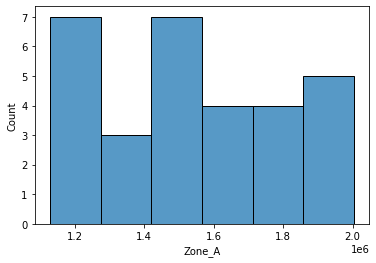

In [34]:
sns.histplot(x=dzw['Zone_A'])
plt.show()


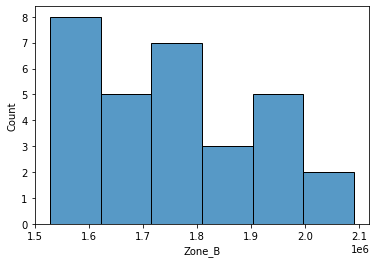

In [35]:
sns.histplot(x=dzw['Zone_B'])
plt.show()


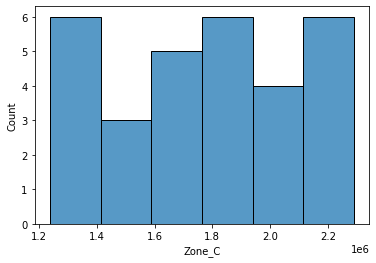

In [36]:
sns.histplot(x=dzw['Zone_C'])
plt.show()


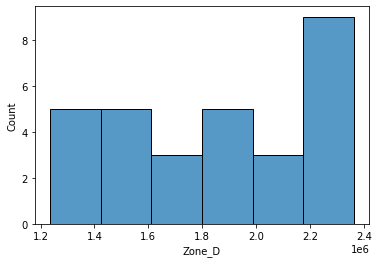

In [37]:
sns.histplot(x=dzw['Zone_D'])
plt.show()


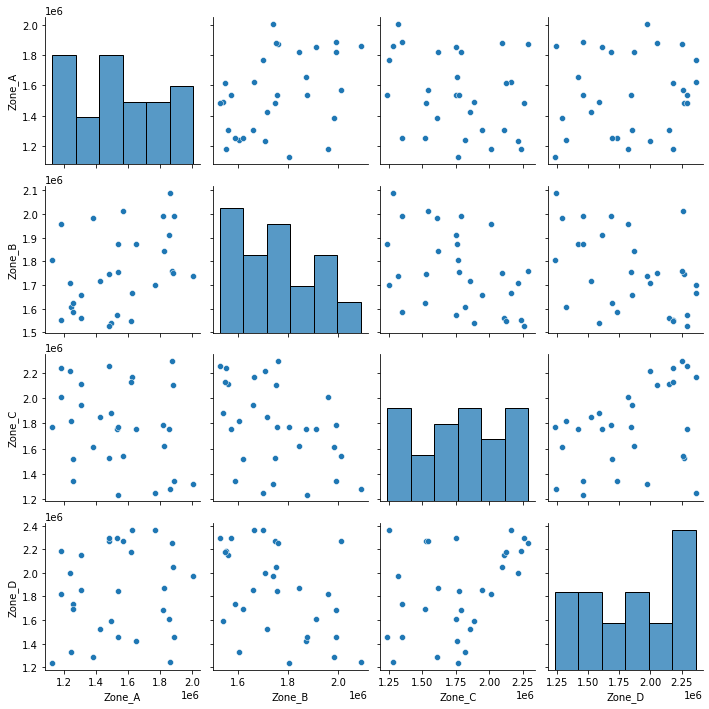

In [38]:
sns.pairplot(dzw)
plt.show()


#### Dataset consists of 29 rows and 5 columns.
#### No null values are present in the dataset
#### Zones are normally distributed 
#### ZoneD are skewed to left and Zone A abd B are skewed to right

## 1.The mean sales generated by each zone


In [71]:
data.describe().astype(int)


,Zone_A,Zone_B,Zone_C,Zone_D
count,29,29,29,29
mean,1540493,1755559,1772871,1842926
std,261940,168389,333193,375016
min,1128185,1527574,1237722,1234311
25%,1305972,1606010,1523308,1520406
50%,1534390,1740365,1767047,1854412
75%,1820196,1875658,2098463,2180416
max,2004480,2091194,2290580,2364132


In [72]:
data.mean().astype(int)


Zone_A    1540493
Zone_B    1755559
Zone_C    1772871
Zone_D    1842926
dtype: int32

### Mean sales generated by each zone is 
#### > Zone A:-1540493.0
#### > Zone B:-1755559.0
#### > Zone C:-1772871.0
#### > Zone D:-1842926.0

### 2. Total sales generated by all the zones for each month.

In [73]:
dpq= data.sum(numeric_only=True, axis=1)
print(" Total sales by all zones for each month ", sep ='/n')
print(dpq)

 Total sales by all zones for each month 
0     7022544
1     7152303
2     6475939
3     8174449
4     5995328
5     7151387
6     7287108
7     7816299
8     6703395
9     7128210
10    7032783
11    6111084
12    5925424
13    7155515
14    5934156
15    6506659
16    7149383
17    7083490
18    6971953
19    7124599
20    7389597
21    7560001
22    6687919
23    7784747
24    6095918
25    6512360
26    6267918
27    7470920
28    6772277
dtype: int64


### 3.Check whether all the zones generate the same amount of sales.


#### Null Hypothesis :- All the zones generated same amount of sales 
#### Alternate Hypothesis:- Sales generated by atleast one zone is different

In [51]:
#numerator degrees of freedom (k-1) = (3-1) = 2
df_Nr=2
#denominator degrees of freedom(N-k) = (3*29-3) = 84
df_Dr=84
alpha=.05
b=0.95
f_critical=stats.f.ppf(b,df_Nr,df_Dr)
round(f_critical,6)


3.105157

In [74]:
ftest,pvalue=f_oneway(data['Zone_A'],data['Zone_B'],data['Zone_C'],data['Zone_D'])

In [75]:
print("F statistic value is:%.06f"%ftest)

F statistic value is:5.672056


In [76]:
print("Pvalue is%.5f"%pvalue)

Pvalue is0.00118


In [77]:
if pvalue<alpha:
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')

Reject null hypothesis


In [78]:
if(ftest>f_critical):
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')

Reject null hypothesis


### Interpretations:-
#### From the above calculations our critical f value is 3.105157 and f-statistic value is 5.672056.Here f-statistic value is greater than f critical value also the p-value obtained 0.00118 is less than the alpha value 0.05,so we reject the null hypothesis.We can conclude that sales generated by all the zones is not the same 